## Heart Disease Research Part II

Print results and graph results in this project. Sometimes the printouts are formatted in a way that is difficult to read — feel free to expand the middle segment to make your printouts more readable.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency

### Load and Inspect data

In [12]:
heart = pd.read_csv('heart_disease.csv')
print(heart.head())

   age     sex  trestbps  chol                cp  exang  fbs  thalach  \
0   63    male       145   233    typical angina      0    1      150   
1   67    male       160   286      asymptomatic      1    0      108   
2   67    male       120   229      asymptomatic      1    0      129   
3   37    male       130   250  non-anginal pain      0    0      187   
4   41  female       130   204   atypical angina      0    0      172   

  heart_disease  
0       absence  
1      presence  
2      presence  
3       absence  
4       absence  


### Predictors of heart diseases

Each of the patients in this dataset underwent an exercise test, during which their heart rate was monitored. For each patient, thalach gives us the highest heart rate that the patient achieved during this test.

Is thalach associated with whether or not a patient will ultimately be diagnosed with heart disease? Use sns.boxplot() to plot side by side box plots of thalach for patients who were and were not diagnosed with heart disease (indicated by the heart_disease variable). Do you think there is a relationship between these variables? Yes, there is a relationship as patients with heart diseases have lower thalach

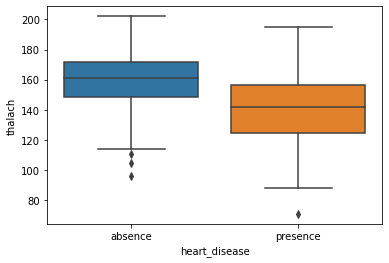

In [13]:
sns.boxplot(x = heart.heart_disease, y = heart.thalach)
plt.show()

In order to investigate this question further, save the values for thalach among patients who were diagnosed with heart disease as a variable named thalach_hd. Then save the values of thalach among patients who were not diagnosed with heart disease as thalach_no_hd.

Calculate and print the difference in mean thalach for patients diagnosed with heart disease compared to patients without heart disease. Then do the same for the median difference.

In [14]:
thalach_hd = heart.thalach[heart.heart_disease == 'presence']
thalach_no_hd = heart.thalach[heart.heart_disease == 'absence']

mean_thalach_hd = np.mean(thalach_hd)
mean_thalach_no_hd = np.mean(thalach_no_hd)
median_thalach_hd = np.median(thalach_hd)
median_thalach_no_hd = np.median(thalach_no_hd)
print('The mean thalach for people with heart disease is', mean_thalach_hd)
print('The mean thalach for people without heart disease is', mean_thalach_no_hd)
print('The median thalach for people with heart disease is', median_thalach_hd)
print('The median thalach for people with heart disease is', median_thalach_no_hd)

The mean thalach for people with heart disease is 139.25899280575538
The mean thalach for people without heart disease is 158.3780487804878
The median thalach for people with heart disease is 142.0
The median thalach for people with heart disease is 161.0


We’d like to find out if the average thalach of a heart disease patient is significantly different from the average thalach for a person without heart disease.

Import the statistical test from scipy.stats that we would use to test the following null and alternative hypotheses:
- Null: The average thalach for a person with heart disease is equal to the average thalach for a person without heart disease.
- Alternative: The average thalach for a person with heart disease is NOT equal to the average thalach for a person without heart disease.

Using a significance threshold of 0.05, is there a significant difference in average thalach for people with heart disease compared to people with no heart disease? The null hypotheses is discarded as the the significance thershold is smaller than 0.05

In [16]:
tstat, pval = ttest_ind(thalach_hd, thalach_no_hd)
print(pval)

3.456964908430172e-14


Using the same process, investigate at least one other quantitative variable. Options include age, trestbps (resting blood pressure), and chol (cholesterol). Are any of these variables also significantly associated with heart disease?

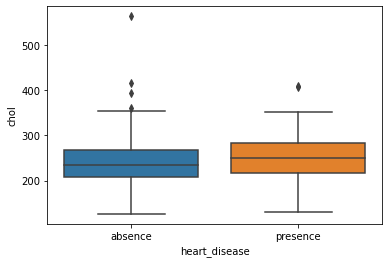

0.13914167020436527


In [17]:
plt.clf()
sns.boxplot(x = heart.heart_disease, y = heart.chol)
plt.show()

chol_hd = heart.chol[heart.heart_disease == 'absence']
chol_hd_no = heart.chol[heart.heart_disease == 'presence']
tstat, pval = ttest_ind (chol_hd, chol_hd_no)
print(pval)

### Chest Pain and Max Heart Rate

Next, let’s investigate the relationship between thalach (maximum heart rate achieved during exercise) and the type of heart pain a person experiences. Create a set of side-by-side box plots of thalach for each chest pain type in the data. Make sure to use plt.clf() to clear the previous plots first!

Are there any chest pain types for which average thalach is significantly higher or lower (compared to other chest pain types)?

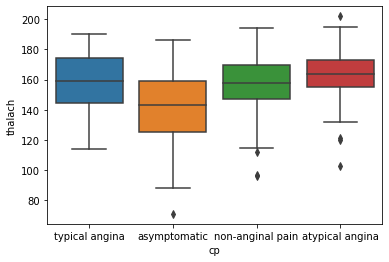

In [18]:
plt.clf()
sns.boxplot(x = heart.cp, y = heart.thalach)
plt.show()

To investigate this further, save the values of thalach for patients who experienced each type of chest pain as thalach_typical, thalach_asymptom, thalach_nonangin, and thalach_atypical, respectively.

In [19]:
thalach_typical = heart.thalach[heart.cp == 'typical angina']
thalach_asymptom = heart.thalach[heart.cp == 'asymptomatic']
thalach_nonangin = heart.thalach[heart.cp == 'non-anginal pain']
thalach_atypical = heart.thalach[heart.cp == 'atypical angina']

Run a single hypothesis test to address the following null and alternative hypotheses:
- Null: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people all have the same average thalach.
- Alternative: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people do not all have the same average thalach.

Save the resulting p-value as pval and print it out. Using a significance threshold of 0.05, is there at least one pair of chest pain categories for which people in those categories have significantly different thalach?

In [21]:
fstat, pval = f_oneway(thalach_typical, thalach_asymptom, thalach_nonangin, thalach_atypical)
print(pval)

1.9065505247705008e-10


If you completed the previous step correctly, you should have concluded that there is at least one pair of chest pain types (cp) for which people with those pain types have significantly different average max heart rates during exercise (thalach).

Run another hypothesis test to determine which of those pairs are significantly different. Use an overall type I error rate of 0.05 for all six comparisons.

In [24]:
tukey_results_thalach_cp = pairwise_tukeyhsd(heart.thalach, heart.cp, 0.05)
print(tukey_results_thalach_cp)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394  0.001  12.7439  30.735   True
    asymptomatic non-anginal pain  14.7264  0.001    7.258 22.1948   True
    asymptomatic   typical angina   15.276 0.0081   2.9702 27.5817   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7591   2.733  False
 atypical angina   typical angina  -6.4635 0.6069 -20.2707  7.3438  False
non-anginal pain   typical angina   0.5495    0.9  -12.315 13.4141  False
-------------------------------------------------------------------------


### Heart Disease and Chest Pain

Finally, let’s investigate the relationship between the kind of chest pain a person experiences and whether or not they have heart disease. Create a contingency table of cp and heart_disease and save it as Xtab, then print it out.

In [25]:
Xtab = pd.crosstab(heart.cp, heart.heart_disease)
print(Xtab)

heart_disease     absence  presence
cp                                 
asymptomatic           39       105
atypical angina        41         9
non-anginal pain       68        18
typical angina         16         7


Run a hypothesis test for the following null and alternative hypotheses:
- Null: There is NOT an association between chest pain type and whether or not someone is diagnosed with heart disease.
- Alternative: There is an association between chest pain type and whether or not someone is diagnosed with heart disease.

Save the p-value as pval and print it out. Using a significance threshold of 0.05, is there a significant association between chest pain type and whether or not someone is diagnosed with heart disease?

In [27]:
chi2, pval, dof, expected = chi2_contingency(Xtab)
print(pval)

1.2517106007837527e-17
